In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
dataset = pd.read_csv("BlackFriday.csv")
X = dataset.iloc[:,2:11].values
Y = dataset.iloc[:,11:].values

In [27]:
X.shape

(537577, 9)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


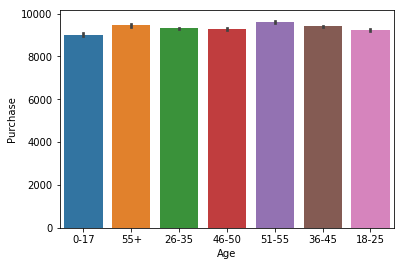

In [28]:
import seaborn as sns
sns.barplot(x="Age", y="Purchase", data=dataset)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


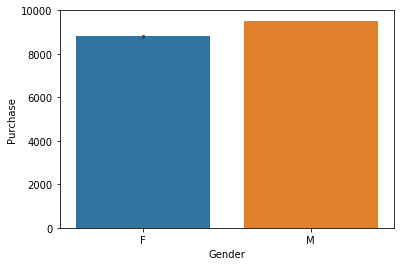

In [29]:
sns.barplot(x="Gender", y="Purchase", data=dataset)

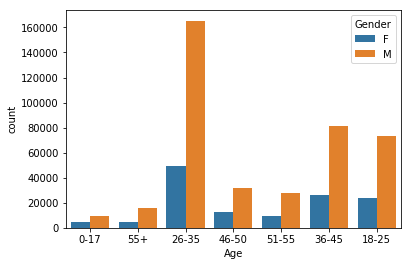

In [30]:
sns.countplot(dataset['Age'],hue=dataset['Gender'])

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


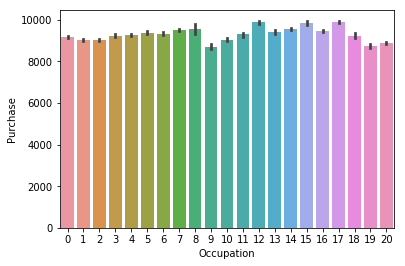

In [31]:
sns.barplot(x="Occupation", y="Purchase", data=dataset)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


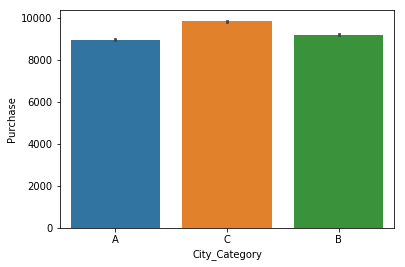

In [32]:
sns.barplot(x = "City_Category", y="Purchase", data=dataset)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


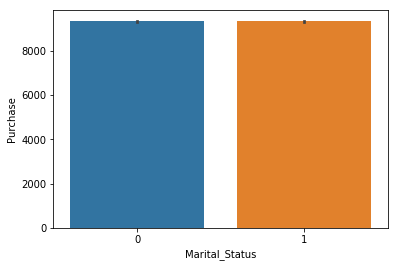

In [33]:
sns.barplot(x = "Marital_Status", y="Purchase", data=dataset)

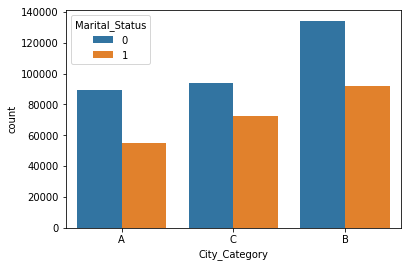

In [34]:
sns.countplot(dataset['City_Category'],hue=dataset['Marital_Status'])

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


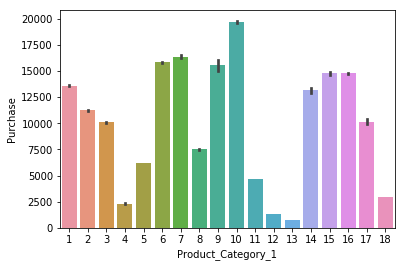

In [35]:
sns.barplot(x = "Product_Category_1", y="Purchase", data=dataset)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


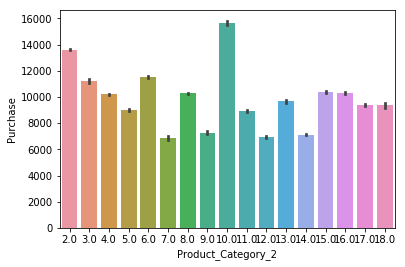

In [36]:
sns.barplot(x = "Product_Category_2", y="Purchase", data=dataset)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


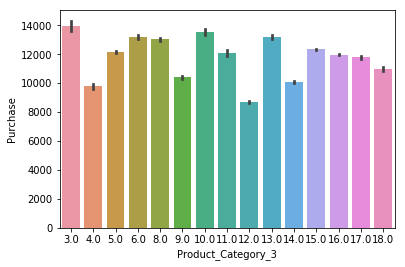

In [37]:
sns.barplot(x = "Product_Category_3", y="Purchase", data=dataset)

In [38]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="mean", axis = 0)
imputer = imputer.fit(X[:,7:9])
X[:,7:9] = imputer.transform(X[:,7:9])

In [42]:
X[0]

array(['F', '0-17', 10, 'A', '2', 0, 3, 9.842144034798471,
       12.669840149015693], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_x0 = LabelEncoder()
labelEncoder_x1 = LabelEncoder()
labelEncoder_x3 = LabelEncoder()
labelEncoder_x4 = LabelEncoder()

X[:,0] = labelEncoder_x0.fit_transform(X[:,0])
X[:,1] = labelEncoder_x1.fit_transform(X[:,1])
X[:,3] = labelEncoder_x3.fit_transform(X[:,3])
X[:,4] = labelEncoder_x4.fit_transform(X[:,4])
onehotencoder = OneHotEncoder(categorical_features = [0,1,3,4])
X = onehotencoder.fit_transform(X).toarray()

In [5]:
def featureNorm(X):
    # save the feature data in another variable
    x_norm = X.copy()
    
    # Create a row vector of zeros, having the same number of rows as the input feature
    mean = np.mean(X, axis=0)
    standard_deviation = np.std(X, axis=0)
    print("mean  is", mean , "\n")
    print("standard_deviation  is", standard_deviation , "\n")
    
    # The formula
    x_norm = np.divide((X - mean),standard_deviation)
    print("... Input feature has been normalized", "\n")
    
    # Now, we can add the one vector that represent the coefficent of the bias that we discussed earlier
    x = np.concatenate((np.ones((X[:,0].size, 1)), x_norm), axis=1) 
    print("... A ones vector has been successfully concatenated to the input feature matrix", "\n")
    
    return x, mean, standard_deviation

In [50]:
def fnorm(X, m, std):
    
    # The formula
    x_norm = np.divide((X - m),std)
    x = np.concatenate((np.ones((X[:,0].size, 1)), x_norm), axis=1) 
    
    return x

In [6]:
x, mean, standard_deviation = featureNorm(X)

mean  is [ 0.24591268  0.75408732  0.02735794  0.18161863  0.39936604  0.19996949
  0.0828272   0.06997695  0.03888373  0.26905541  0.42132197  0.30962262
  0.13528295  0.3519347   0.1850135   0.17357885  0.15419     8.08271001
  0.40879725  5.2955465   9.84214403 12.66984015] 

standard_deviation  is [0.43062702 0.43062702 0.16312414 0.3855299  0.48976812 0.39997712
 0.27562086 0.25510817 0.19331784 0.44346882 0.49377097 0.46233803
 0.34202554 0.47757373 0.38830851 0.37874693 0.36113079 6.5241137
 0.49161169 3.75069746 4.22386832 2.27993575] 

... Input feature has been normalized 

... A ones vector has been successfully concatenated to the input feature matrix 



In [7]:
x

array([[ 1.00000000e+00,  1.75113795e+00, -1.75113795e+00, ...,
        -6.12031901e-01, -3.21301831e-13,  2.93442162e-11],
       [ 1.00000000e+00,  1.75113795e+00, -1.75113795e+00, ...,
        -1.14526606e+00, -9.09626851e-01,  5.83419883e-01],
       [ 1.00000000e+00,  1.75113795e+00, -1.75113795e+00, ...,
         1.78752181e+00, -3.21301831e-13,  2.93442162e-11],
       ...,
       [ 1.00000000e+00, -5.71057238e-01,  5.71057238e-01, ...,
         7.21053492e-01,  1.22112139e+00,  2.93442162e-11],
       [ 1.00000000e+00, -5.71057238e-01,  5.71057238e-01, ...,
        -7.87977440e-02, -3.21301831e-13,  2.93442162e-11],
       [ 1.00000000e+00, -5.71057238e-01,  5.71057238e-01, ...,
        -7.87977440e-02, -4.36127241e-01,  2.93442162e-11]])

In [8]:
def train(x, Y):
    iteration = 1000
    # For this practice are initiallizing are theta with values of zero.
    theta = np.zeros((23, 1))
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)

        print("Running Gradient Descent. Current cost function is ", np.log(cost_function[i]))
        
    return theta, cost_function

In [9]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return (1/2*m) * np.sum(np.square(h - Y))

In [10]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - Y)))
    return theta

In [11]:
theta, cost_values = train(x, Y)

Running Gradient Descent. Current cost function is  44.21363525112111
Running Gradient Descent. Current cost function is  44.19743415022202
Running Gradient Descent. Current cost function is  44.18130223968651
Running Gradient Descent. Current cost function is  44.16524026203833
Running Gradient Descent. Current cost function is  44.14924896052796
Running Gradient Descent. Current cost function is  44.133329078805815
Running Gradient Descent. Current cost function is  44.117481360588386
Running Gradient Descent. Current cost function is  44.101706549317385
Running Gradient Descent. Current cost function is  44.08600538781208
Running Gradient Descent. Current cost function is  44.07037861791492
Running Gradient Descent. Current cost function is  44.05482698013075
Running Gradient Descent. Current cost function is  44.039351213259756
Running Gradient Descent. Current cost function is  44.023952054024356
Running Gradient Descent. Current cost function is  44.00863023669029
Running Gradien

Running Gradient Descent. Current cost function is  42.90881942937072
Running Gradient Descent. Current cost function is  42.90359579989851
Running Gradient Descent. Current cost function is  42.89844972712134
Running Gradient Descent. Current cost function is  42.893380444840574
Running Gradient Descent. Current cost function is  42.88838718292329
Running Gradient Descent. Current cost function is  42.88346916768668
Running Gradient Descent. Current cost function is  42.87862562227734
Running Gradient Descent. Current cost function is  42.87385576704506
Running Gradient Descent. Current cost function is  42.86915881991091
Running Gradient Descent. Current cost function is  42.86453399672939
Running Gradient Descent. Current cost function is  42.859980511644316
Running Gradient Descent. Current cost function is  42.855497577438285
Running Gradient Descent. Current cost function is  42.851084405875575
Running Gradient Descent. Current cost function is  42.84674020803814
Running Gradient

Running Gradient Descent. Current cost function is  42.63671203837177
Running Gradient Descent. Current cost function is  42.63609803299363
Running Gradient Descent. Current cost function is  42.635495845529746
Running Gradient Descent. Current cost function is  42.63490525499388
Running Gradient Descent. Current cost function is  42.634326044275795
Running Gradient Descent. Current cost function is  42.633758000083226
Running Gradient Descent. Current cost function is  42.63320091288429
Running Gradient Descent. Current cost function is  42.63265457685041
Running Gradient Descent. Current cost function is  42.63211878979974
Running Gradient Descent. Current cost function is  42.63159335314106
Running Gradient Descent. Current cost function is  42.63107807181828
Running Gradient Descent. Current cost function is  42.63057275425541
Running Gradient Descent. Current cost function is  42.6300772123021
Running Gradient Descent. Current cost function is  42.62959126117972
Running Gradient D

Running Gradient Descent. Current cost function is  42.6083191136523
Running Gradient Descent. Current cost function is  42.608258221445794
Running Gradient Descent. Current cost function is  42.608198526937
Running Gradient Descent. Current cost function is  42.6081400065522
Running Gradient Descent. Current cost function is  42.60808263717997
Running Gradient Descent. Current cost function is  42.60802639616223
Running Gradient Descent. Current cost function is  42.60797126128544
Running Gradient Descent. Current cost function is  42.60791721077194
Running Gradient Descent. Current cost function is  42.60786422327148
Running Gradient Descent. Current cost function is  42.607812277852936
Running Gradient Descent. Current cost function is  42.60776135399613
Running Gradient Descent. Current cost function is  42.60771143158385
Running Gradient Descent. Current cost function is  42.607662490893986
Running Gradient Descent. Current cost function is  42.60761451259185
Running Gradient Desc

Running Gradient Descent. Current cost function is  42.60551703718272
Running Gradient Descent. Current cost function is  42.6055111378826
Running Gradient Descent. Current cost function is  42.60550535326327
Running Gradient Descent. Current cost function is  42.6054996810742
Running Gradient Descent. Current cost function is  42.605494119109274
Running Gradient Descent. Current cost function is  42.605488665205876
Running Gradient Descent. Current cost function is  42.605483317244015
Running Gradient Descent. Current cost function is  42.60547807314554
Running Gradient Descent. Current cost function is  42.60547293087323
Running Gradient Descent. Current cost function is  42.60546788843008
Running Gradient Descent. Current cost function is  42.60546294385842
Running Gradient Descent. Current cost function is  42.6054580952392
Running Gradient Descent. Current cost function is  42.60545334069119
Running Gradient Descent. Current cost function is  42.60544867837025
Running Gradient Des

Running Gradient Descent. Current cost function is  42.605242643552145
Running Gradient Descent. Current cost function is  42.60524202855579
Running Gradient Descent. Current cost function is  42.60524142507443
Running Gradient Descent. Current cost function is  42.605240832886885
Running Gradient Descent. Current cost function is  42.605240251776266
Running Gradient Descent. Current cost function is  42.60523968152993
Running Gradient Descent. Current cost function is  42.60523912193936
Running Gradient Descent. Current cost function is  42.60523857280013
Running Gradient Descent. Current cost function is  42.605238033911775
Running Gradient Descent. Current cost function is  42.60523750507773
Running Gradient Descent. Current cost function is  42.60523698610528
Running Gradient Descent. Current cost function is  42.605236476805445
Running Gradient Descent. Current cost function is  42.60523597699294
Running Gradient Descent. Current cost function is  42.605235486486066
Running Gradie

Running Gradient Descent. Current cost function is  42.60521279412043
Running Gradient Descent. Current cost function is  42.605212724644666
Running Gradient Descent. Current cost function is  42.605212656357054
Running Gradient Descent. Current cost function is  42.60521258923605
Running Gradient Descent. Current cost function is  42.60521252326052
Running Gradient Descent. Current cost function is  42.605212458409724
Running Gradient Descent. Current cost function is  42.60521239466332
Running Gradient Descent. Current cost function is  42.60521233200132
Running Gradient Descent. Current cost function is  42.60521227040417
Running Gradient Descent. Current cost function is  42.6052122098526
Running Gradient Descent. Current cost function is  42.60521215032779
Running Gradient Descent. Current cost function is  42.605212091811204
Running Gradient Descent. Current cost function is  42.6052120342847
Running Gradient Descent. Current cost function is  42.60521197773045
Running Gradient D

Running Gradient Descent. Current cost function is  42.60520917281367
Running Gradient Descent. Current cost function is  42.605209162383986
Running Gradient Descent. Current cost function is  42.60520915210759
Running Gradient Descent. Current cost function is  42.605209141982016
Running Gradient Descent. Current cost function is  42.60520913200484
Running Gradient Descent. Current cost function is  42.605209122173676
Running Gradient Descent. Current cost function is  42.60520911248618
Running Gradient Descent. Current cost function is  42.60520910294005
Running Gradient Descent. Current cost function is  42.60520909353303
Running Gradient Descent. Current cost function is  42.60520908426289
Running Gradient Descent. Current cost function is  42.60520907512744
Running Gradient Descent. Current cost function is  42.605209066124544
Running Gradient Descent. Current cost function is  42.60520905725209
Running Gradient Descent. Current cost function is  42.605209048508
Running Gradient D

Running Gradient Descent. Current cost function is  42.605208565912
Running Gradient Descent. Current cost function is  42.605208563883814
Running Gradient Descent. Current cost function is  42.60520856188106
Running Gradient Descent. Current cost function is  42.60520855990338
Running Gradient Descent. Current cost function is  42.60520855795045
Running Gradient Descent. Current cost function is  42.605208556021914
Running Gradient Descent. Current cost function is  42.60520855411745
Running Gradient Descent. Current cost function is  42.60520855223674
Running Gradient Descent. Current cost function is  42.60520855037945
Running Gradient Descent. Current cost function is  42.60520854854527
Running Gradient Descent. Current cost function is  42.60520854673388
Running Gradient Descent. Current cost function is  42.60520854494498
Running Gradient Descent. Current cost function is  42.60520854317827
Running Gradient Descent. Current cost function is  42.60520854143344
Running Gradient Des

In [13]:
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 9.33345690e+03 -1.09405109e+02  1.09405109e+02 -9.50100871e+01
 -8.45579124e+01 -7.07147448e+00  3.42495505e+01  1.82988483e+01
  1.01010034e+02  3.64702974e+01 -1.36688356e+02 -6.83058928e+01
  2.04059551e+02 -1.23275654e+01 -2.07318655e+00  1.25029756e+01
 -3.04032136e+00  4.16176688e+00  4.24613234e+01 -3.08389374e+01
 -1.40871032e+03 -4.10997879e+02  1.83447740e+02]


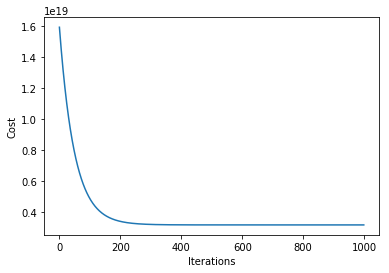

In [14]:
plt.plot(cost_values)
plt.ylabel('Cost')
plt.xlabel('Iterations');

In [56]:
def predict(theta, mean, std):
    gender = input("Input the Gender of the user   M|F  ")
    Age_range = input("Input the Age_range   0-17 18-25 26-35 36-45 45-50 51-55 55+  ")
    Occupation = float(input("Input the occpation   0-20  "))
    City_category = input("Input the City_category   A|B|C  ")
    Years_in_current_city = input("Input the Years_in_current_city   1|2|3|4+  ")
    Marital_status = float(input("Input the marital status  0|1  "))
    Product_Category_1 = float(input("Input the Product_Category_1  0-20  "))
    Product_Category_2 = float(input("Input the Product_Category_2  0-20  "))
    Product_Category_3 = float(input("Input the Product_Category_3  0-20  "))
    
    X_predicted = np.array([gender, Age_range, Occupation, City_category, Years_in_current_city, Marital_status, Product_Category_1, Product_Category_2, Product_Category_3])[None,:]
#     from sklearn.preprocessing import Imputer
#     imputer = Imputer(missing_values="NaN", strategy="mean", axis = 0)
#     imputer = imputer.fit(X_predicted[:,7:9])
#     X_predicted[:,7:9] = imputer.transform(X_predicted[:,7:9])
    
    
    print(X_predicted.shape)
    X_predicted[:,0] = labelEncoder_x0.transform(X_predicted[:,0])
    X_predicted[:,1] = labelEncoder_x1.transform(X_predicted[:,1])
    X_predicted[:,3] = labelEncoder_x3.transform(X_predicted[:,3])
    X_predicted[:,4] = labelEncoder_x4.transform(X_predicted[:,4])
    X_predicted = onehotencoder.transform(X_predicted).toarray()

    print("\nCalculating... ... ... ... ... ...\n")
    
    #Preprocess the data 
    input_vec = fnorm(X_predicted, mean, standard_deviation)#np.array([[1, X_predicted ]])
    
    '''input_norm = np.ones(input_vec.shape)
    input_norm.dtype = np.float
    
    input_norm[:, 1:] = np.divide((input_vec[:, 1:] - mean), std)
    '''
    price = input_vec @ theta
    print("Purchase =" ,int(price))

In [57]:
predict(theta, mean, standard_deviation)

Input the Gender of the user   M|F  F
Input the Age_range   0-17 18-25 26-35 36-45 45-50 51-55 55+  0-17
Input the occpation   0-20  19
Input the City_category   A|B|C  A
Input the Years_in_current_city   1|2|3|4+  3
Input the marital status  0|1  1
Input the Product_Category_1  0-20  15
Input the Product_Category_1  0-20  10
Input the Product_Category_1  0-20  14
(1, 9)

Calculating... ... ... ... ... ...

Purchase = 4540


In [55]:
int(9.56)

9